<a href="https://colab.research.google.com/github/AlbertMdz/Fundamentos-de-redes-Nueronales-y-Artificiales/blob/master/Aprendizaje_extremo_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import exp, array, random, dot, tanh
from sklearn import datasets
import copy
np.random.seed(10)

from math import exp
from random import seed
# Test training backprop algorithm
seed(2)

Algunas funciones útiles
- Una función no lineal (sigmoide o tanh)
- Por defecto, escojemos tanh porque sigmoid puede causar un problema de desbordamiento.
- También se puede ver la función sigmoide a continuación en los comentarios en el código.
- Función de activación
- Suma de la función de error al cuadrado
- Función de errores de trazado
- Mezclar dos vectores juntos
- Crear una lista de 'saltos' que contiene pesos

In [0]:
def nonlin(x,deriv=False):
    if deriv==True:
        return 1-tanh(x)**2
    return tanh(x)

def activate(weights,prev_layer):
    return nonlin(np.dot(weights[:-1],prev_layer) + weights[-1])

def sum_of_squared_error(v1,v2):
    if(len(v1)!=len(v2)):
        print("Lengths of vectors must be consistent.")
        return -1
    return np.sum(np.square(np.array(v1)-np.array(v2)))

def plot_errors(ERRORS,labelx='Epoch',labely='Total Error',figsize=(10,3)):
    # PLot the error as a function of iteratation
    plt.figure(figsize=figsize)
    plt.plot(ERRORS)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

def shuffle_together(x,y):
    together = list(zip(x, y))
    random.shuffle(together)
    x, y = zip(*together)
    return np.asarray(list(x)),  np.asarray(list(y))

def create_jump_list(sizes):
    jumps = list()
    for i in range(1,len(sizes)):
        jumps.append(Jump(sizes[i-1],sizes[i]))
    return jumps


Pesos entre capas

In [0]:
class Jump():
    def __init__(self,left,right):
        #self.weights = random.random((left, right))
        self.weights = np.random.uniform(low=-1,high=1,size=(left,right))

Clase de la ANN con todas las funciones incluidas.
La red se inicia con pesos dados en la matriz de saltos.
La propagación hacia adelante devuelve valores en la capa de salida cuando se le da una fila de entrada.
La función de entrenamiento entrena la red con:
- Conjunto de entrenamiento
-Número de épocas
-Tasa de aprendizaje
-Umbral de error


In [0]:
class Network():
    # Network is initiated with given weights in jumps array.
    def __init__(self,jumps):
        self.jumps = jumps
        self.n_jumps = len(jumps)
    
    # Training function, returns errors in each epoch.
    def train(self,X_train,y_train,n_epoch,l_rate,threshold):
        SSE_output = []
        for epoch in range(n_epoch):
            
            cur_outputs = []
            left = X_train[:]
            
            for jump in self.jumps:
                left = nonlin(dot(left,jump.weights))
                cur_outputs.append(left)
            
            errors = [0]*self.n_jumps
            deltas = [0]*self.n_jumps
            
            # Error and delta at output layer
            errors[-1] = y_train - cur_outputs[-1]
            deltas[-1] = errors[-1]*nonlin(cur_outputs[-1],deriv=True)
            
            # Append the sum of squared error to SSE_output
            SSE_output.append(np.sum(np.square(errors[-1])))
            if SSE_output[-1]<threshold:
                break
            
            # Calculating the errors and deltas for backpropagation
            for i in reversed(range(self.n_jumps-1)):
                errors[i] = deltas[i+1].dot(self.jumps[i+1].weights.T)
                deltas[i] = errors[i]*nonlin(cur_outputs[i],deriv=True)
            
            # Adjusting changes
            adjustments = []
            adjustments.append(X_train.T.dot(deltas[0]))
            for i in range(1,len(self.jumps)):
                adjustments.append(cur_outputs[i-1].T.dot(deltas[i]))
            
            # The backpropagation: changing weights
            for i,jump in enumerate(self.jumps):
                jump.weights+=l_rate*adjustments[i]
        return SSE_output
    
    # Gives a result on the output layer when given an input row.
    def forward_propagate(self,row):
        left = row
        for jump in self.jumps:
            left = nonlin(dot(left,jump.weights))
        return left

Parametros del problema XOR

In [0]:
sizes_xor = [2,8,1]
X_train_xor = np.asarray([[0,0],[0,1],[1,0],[1,1]])
y_train_xor = [[0],[1],[1],[0]]

X_test_xor = [[0,0],[0,1],[1,0],[1,1]]
y_test_xor = [[0],[1],[1],[0]]

jumps_xor = create_jump_list(sizes_xor)
network_xor = Network(jumps_xor)

Entrenamiento de la red XOR

In [0]:
n_epoch_xor   = 10000
l_rate_xor    = 0.005
threshold_xor = 0.003

SSE_errors_xor = network_xor.train(X_train_xor,y_train_xor,n_epoch_xor,l_rate_xor,threshold_xor)
test_results_xor = network_xor.forward_propagate(X_test_xor)

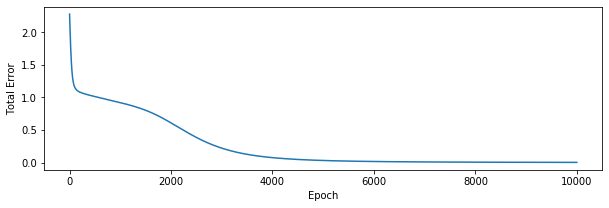

In [0]:
plot_errors(SSE_errors_xor)

Accuracy de la red XOR

In [0]:
print('\t  Resultado VS Esperado')
acc = 0
for i,elm in enumerate(test_results_xor):
    prediction = elm[0]>0.5
    print(elm[0],'==>',int(prediction),'vs',y_test_xor[i][0])
    if prediction == y_test_xor[i]:
        acc+=1
        
print('Accuracy:',acc/len(y_test_xor))

	  Resultado VS Esperado
0.0 ==> 0 vs 0
0.9621884482166746 ==> 1 vs 1
0.964719928078242 ==> 1 vs 1
0.018024264605710293 ==> 0 vs 0
Accuracy: 1.0
